In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data set can be found here http://archive.ics.uci.edu/dataset/42/glass+identification . Ther are 6 types of glass, defined in terms of their oxide content. It has 214 samples. In total it has 11 attributes, one is the glass class and 9 of them can be used for classification.

In [79]:
df = pd.read_csv("glass.data",header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [91]:
df.shape

(214, 10)

In [80]:
# the first column is like stated in the description an id, and can not used for classification.
# Drop the first column (axis=1 refers to columns)
df = df.drop(df.columns[0], axis=1)


In [81]:
df.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [82]:
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [83]:
# check after missing values
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

We are not seeing any missing values. We also looked through the data and saw no representation of null values. Also the data set description states there are no missing values. Since all fields are numerical, we not need to convert any strings.

### Normalisation

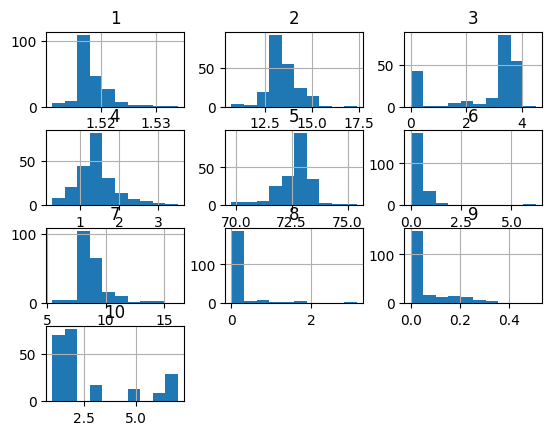

In [84]:
df.hist()
pass

We not see any Outliers, but we see that the values differ in range, so we have to normalize them. For features 1,2,4,5,6,7 we will use a standardisation because they look like a normal distribution. We not have to normalize the class column because we have unsupervised learning. For the other columns we will use normalisation.

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [86]:
std_scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[[1,2,4,5,6,7]] = std_scaler.fit_transform(df[[1,2,4,5,6,7]])



In [87]:
mm_scaler = MinMaxScaler()
cols = [3,8,9]
df_scaled[cols] = mm_scaler.fit_transform(df[cols])

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: >, <Axes: >]], dtype=object)

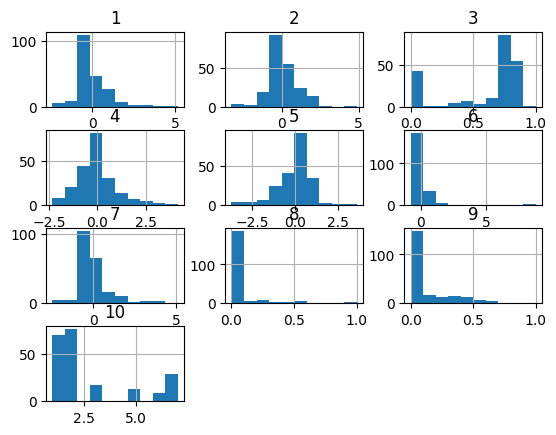

In [88]:
df_scaled.hist()

In [89]:
# Save the preprocessed data
df_scaled.to_csv("glas-preprocessed.csv", index=False)